# Group 18 Project Proposal
By: Sandra Radic, Charlie Sushams, Alex Grinius, & Clare Vu

## Introduction

In the world of tennis (and most sports), events and tournaments are divided into categories of males and females for fairness (excluding partnered matches). Therefore, female and male statistics are not usually compared in one group. However, there are many outstanding female players that could very well pose as serious competition to the male dominated sport - 23-time Grand Slam champion Serena Williams is definitely one of them. Williams is ranked number 1 in international women's tennis, and started her professional career in her early teenage years, reflecting her exceptional skill and sportsmanship. This leads us to our question: How would top player Serena Williams rank amongst the top 500 male players? Our group intends to analyze the factors that separate men's and women's sports, and use them in a classification model to predict which category (intervals from 1 - 501 players) Williams would fall under if she were to partake in a men's only tournament. To conduct this analysis, we will be using the Player Stats for Top 500 players dataset, from  https://www.ultimatetennisstatistics.com/. We will be considering the factors of height, number of seasons played, and the age the player entered. This will allow us to examine whether physical stature serves as a male advantage or not, and otherwise compares skill level. Consequently, we will be creating categories using the "best rank" column to further sort our data and choose a new rank level for Serena. 

## Preliminary exploratory data analysis:

instructions from sandra:

* Read player_stats.csv - **done**
* Read what I wrote in "Method" to see what we need to do to create a smaller tidy dataset - **done**
* Find out serena williams' height, age turned pro, and # of seasons played and mutate it as a new column - **created df but missing data**
* Use only TRAINING DATA to make a table and visualization - **done**
* add to method section about how we can visualize our data (eg scatterplots to compare variables maybe?) - **rough draft**

In [3]:
library(tidyverse)
library(tidymodels)
library(cowplot)
library(scales)
library(stringr)

Warning message:
"package 'tidyverse' was built under R version 4.0.5"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.5     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

Warning message:
"package 'ggplot2' was built under R version 4.0.5"
Warning message:
"package 'tibble' was built under R version 4.0.5"
Warning message:
"package 'tidyr' was built under R version 4.0.5"
Warning message:
"package 'readr' was built under R version 4.0.4"
Warning message:
"package 'dplyr' was built under R version 4.0.5"
Warning message:
"package 'stringr' was built under R version 4.0.5"
Warning message:
"package 'forcats' was built under R version 4.0.4"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks s

Warning message:
"Missing column names filled in: 'X1' [1]"

-- Column specification ------------------------------------------------------------------------------------------------
cols(
  .default = col_character(),
  X1 = col_double(),
  `Turned Pro` = col_double(),
  Seasons = col_double(),
  Titles = col_double(),
  `Best Season` = col_double(),
  Retired = col_double(),
  Masters = col_double(),
  `Grand Slams` = col_double(),
  `Davis Cups` = col_double(),
  `Team Cups` = col_double(),
  Olympics = col_double(),
  `Weeks at No. 1` = col_double(),
  `Tour Finals` = col_double()
)
i Use `spec()` for the full column specifications.




Best_rank,Height_cm,Seasons,Name,Year_turned_pro,Age,Birthdate,Age_turned_pro
<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
3,198,14,Juan Martin Del Potro,2005,31,(23-09-1988),17
11,170,8,Diego Sebastian Schwartzman,2010,27,(16-08-1992),19
10,188,9,Pablo Carreno Busta,2011,28,(12-07-1991),19
1,185,19,Rafael Nadal,2001,33,(03-06-1986),14
3,198,8,Alexander Zverev,2013,22,(20-04-1997),14
4,178,13,Kei Nishikori,2007,30,(29-12-1989),17
8,180,17,Janko Tipsarevic,2002,35,(22-06-1984),18
10,185,7,Lucas Pouille,2012,25,(23-02-1994),18
3,188,13,Grigor Dimitrov,2008,28,(16-05-1991),15


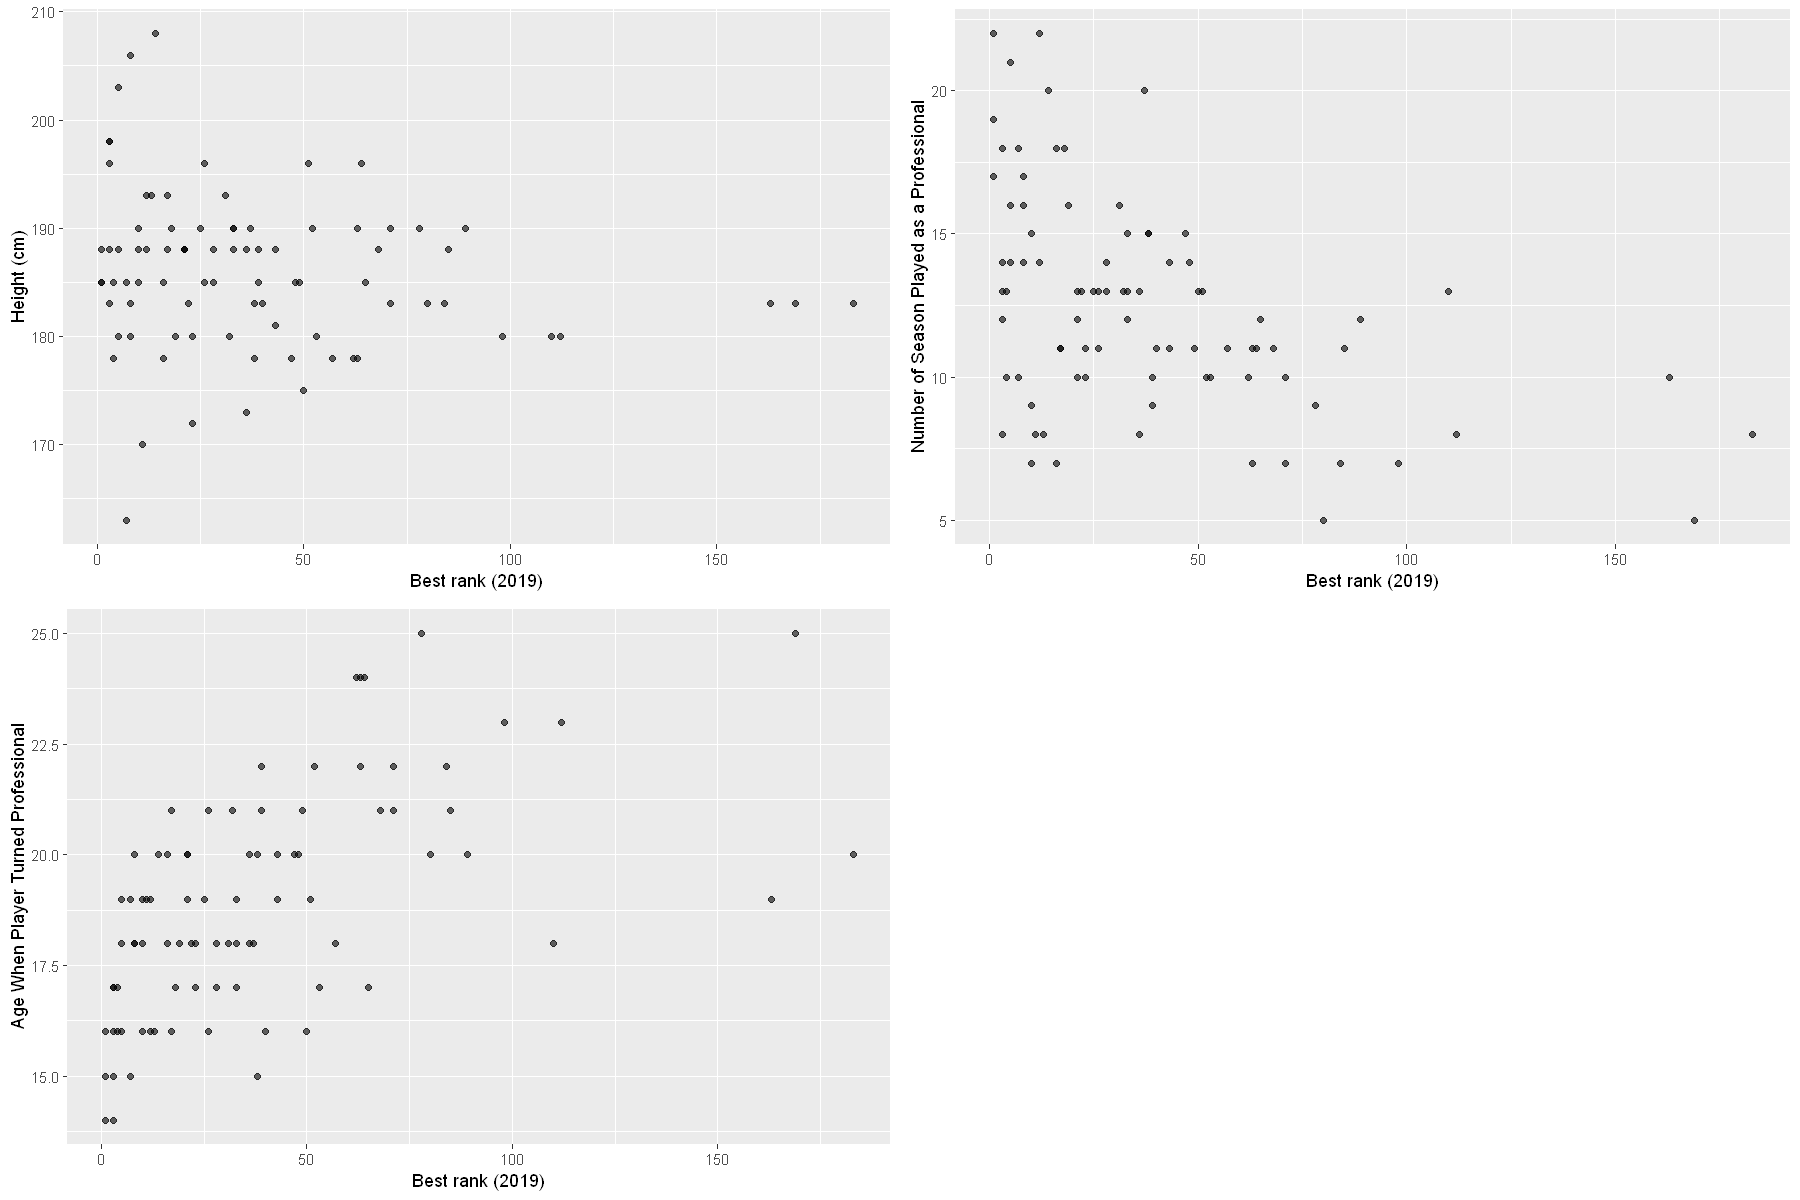

In [31]:
#read in data
player_stats <- read_csv("player_stats.csv")

# select only the necessary columns and filter out any players whose stats aren't known

player_stats_filtered <- player_stats %>%
    select("Best Rank", Height, Seasons, Name, "Turned Pro", Seasons, Age) %>%
    filter(!is.na(Height))
    
# tidy up dataframe (ensure correct datatypes and appropriate column names)

player_stats_tidy <- player_stats_filtered %>%
    separate(col = Age, into = c("Age", "Birthdate"), sep = " ") %>%
    mutate(Age = as.numeric(Age)) %>%
    mutate_at("Height", str_replace, " cm", "") %>%
    mutate(Height = as.numeric(Height)) %>%
    rename(Height_cm = Height, Year_turned_pro = "Turned Pro", Best_rank = "Best Rank")
    player_stats_tidy$Best_rank <- gsub(" .+", "", player_stats_tidy$Best_rank)
    
player_stats_tidy <- mutate(player_stats_tidy, Best_rank = as.integer(Best_rank))


# create new column that lists a player's age when they turned pro

player_stats_age_pro <- player_stats_tidy %>%
     mutate(Age_turned_pro = Age - Seasons)
    
# player_stats_age_pro

# create a dataframe for Serena Williams - currently contains junk data
serena_data <- data.frame(Name = "Serena Williams", Age = 99, Birthdate = "(30-30-1900)", Year_turned_pro = 1900,
    Age_turned_pro = 99, Seasons = 99, Height_cm = "199 cm", Best_rank = 1)

# serena_data

#split the player data into training and testing sets
player_stats_split <- initial_split(player_stats_age_pro, prop = 0.75, strata = Best_rank)
    player_stats_training <- training(player_stats_split)
    player_stats_testing <- testing(player_stats_split)

player_stats_training

#create plots to visualize training data
options(repr.plot.width = 15, repr.plot.height = 10)
height_v_rank <- ggplot(player_stats_training, aes(x = Best_rank, y = Height_cm)) +
    geom_point(alpha = 0.6) +
    xlab("Best rank (2019)") +
    ylab("Height (cm)")

seasons_v_rank <- ggplot(player_stats_training, aes(x = Best_rank, y = Seasons)) +
    geom_point(alpha = 0.6) +
    xlab("Best rank (2019)") +
    ylab("Number of Season Played as a Professional")

pro_age_v_rank <- ggplot(player_stats_training, aes(x = Best_rank, y = Age_turned_pro)) +
    geom_point(alpha = 0.6) +
    xlab("Best rank (2019)") +
    ylab("Age When Player Turned Professional")

plot_grid(height_v_rank, seasons_v_rank, pro_age_v_rank)

## Methods

To tidy our data, we will first subset our dataset to contain columns of interest such as "Height", "Age "Seasons" and "Rank". We will be creating an additional column "Year turned pro", calculated as "Current Age" (in 2019) subtracting "Seasons", to calculate the difference in years and find out how old players were at the start of their professional career. A separate dataframe will be created that contains matching information on the professional female tennis player Serena Williams.

As mentioned in our introduction, we will be creating a classification model by filtering intervals from the "Best Rank" column as categories. Players ranked in the top 10 will be defined as Top Players, players ranked between 11-30 will be Competitive Players, players ranked between 31 - 50 will be Great players, players ranked between 51-100 will be Good players, and the rest will be considered Average Players. The goal is to place Serena Williams in one of these categories by the end of our analysis. 

We plan to visualize our data by plotting the various potential predictors, such as Height, Number of Seasons played, and Age when the player turned professional, against their best rank achieved (in 2019) to determine whether any relationships exist. 


## Expected Outcomes and Significance

* What do you expect to find?

* What impact could such findings have?

* What future questions could this lead to?
